URL dashboard: https://datastudio.google.com/reporting/1d864546-ee31-40cb-b5f7-48a333b8ff80

# I. Perkenalan
Nama    : Fadhilah Amani Alam Aulia

Batch   : 15

# II. Identifikasi Masalah

## II.1. Topik Permasalahan
Film merupakan salah satu bentuk media massa yang dapat memberikan nilai hiburan kepada masyarakat. Film memiliki peran sebagai sarana komunikasi yang digunakan untuk menyebarkan hiburan, menyajikan cerita, peristiwa, musik, drama, humor, dan sajian teknis lainnya pada masyarakat umum. Perkembangan industri perfilman yang makin pesat, menyebabkan munculnya berbagai macam genre film yang diperlihatkan kepada masyarakat. Maka dari itu, sangat penting untuk mengetahui preferensi masyarakat dalam memilih film.

## II.2. Problem Statement
Problem statement pada project ini adalah: 

`Mengetahui Preferensi Masyarakat Global Dalam Memilih Film pada Periode Tahun 2010-2020`

## II.3. Latar Belakang
Film dipandang sebagai salah satu media massa yang mempunyai kekuatan dan kemampuan dalam menjangkau banyak segmen sosial karena film diyakini dapat memenuhi kebutuhan dan selera masyarakat akan hiburan sebagai refreshing diwaktu senggang mereka menghadapi aktifitas hidup. Perusahaan semakin banyak memproduksi film dengan berbagai macam genre. Setiap genre mempunyai segmen pasarnya masing-masing. 

## II.4. Penjabaran Masalah
Penjabaran masalah dilakukan dengan metode 5W+1H:
- Company apa saja yang mendapatkan nilai gross tertinggi pada tahun 2010-2020?
- Pada periode 2010-2020, berapa jumlah film yang dirilis oleh company dengan nilai gross tertinggi di setiap tahunnya?
- 10 film apa sajakah yang mendapatkan nilai gross tertinggi di tahun 2010-2020?
- Berapa persentase setiap genre pada 10 film tersebut?
- Pada company dengan nilai gross tertinggi, apakah terdapat data outlier?
- Apakah ada hubungan antara genre film dengan laris atau tidaknya suatu film?

# III. Data Loading
Pada bagian ini akan dilakukan proses *data loading* dan eksplorasi data sederhana. Dataset yang digunakan adalah dataset 'Movie Industry' yang didapat dari kaggle, dengan link: https://www.kaggle.com/datasets/danielgrijalvas/movies

In [24]:
# Mengimport library yang dibutuhkan
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Mengakses file data csv
data = pd.read_csv('movies.csv')
data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
#Melihat 6 baris pertama pada data movies.csv
data.head(6)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0


In [4]:
# Melihat 6 baris terakhir pada data movies.csv
data.tail(6)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7662,The Robinsons,NaN,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,NaN,90.0
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


# IV. Data Cleaning
Pada bagian ini akan dilakukan proses *data cleaning*. Proses *data cleaning* yang dilakukan pada data ini adalah:
- Menangani missing values
- Mengganti nama kolom
- Menghapus kolom
- Mengganti tipe data pada kolom

## IV.1 Menangani Missing Value
Terdapat dua cara untuk menangani missing value, yaitu dengan menggunakan `dropna()` untuk menghapus data missing value dan `fillna()` untuk mengisi data missing value. Sebelum menggunakan dua fungsi tersebut, cek terlebih dahulu missing value yang ada pada dataset.

In [5]:
# Membuat list missing value
missing_value = ['n/a', 'na', '--', 'Not Rated']
data = (pd.read_csv('movies.csv', na_values = missing_value))
data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [6]:
# Mengecek jumlah missing value di setiap kolom
data.isnull().sum()

name           0
rating       360
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

Pada dataset movie, terdapat 11 kolom yang masih memiliki missing value, yaitu 'rating', 'date', 'score', 'votes', 'writer', 'actor/actress', 'country', 'budget', 'gross', 'company', dan 'runtime (minutes)'. 

Missing value pada kolom 'rating', 'budget', dan 'gross' akan ditangani dengan menggunakan `fillna()`, sedangkan kolom-kolom lainnya akan ditangani dengan `dropna()`.

In [7]:
# Menangani data missing value pada kolom 'budget' dan 'gross' dengan fillna() dan mengisinya dengan nilai median pada kolom 'budget' dan 'gross'
median_b = data['budget'].median()
data['budget'] = data['budget'].fillna(median_b)

median_g = data['gross'].median()
data['gross'] = data['gross'].fillna(median_g)

# Mengecek jumlah missing value pada kolom 'budget' dan 'gross'
data[['budget','gross']].isnull().sum()

budget    0
gross     0
dtype: int64

In [8]:
# Menangani data missing value dengan dropna()
data = data.dropna(axis = 0, how = 'any')

# Mengecek jumlah missing value pada dataset
data.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

## IV.2 Mengganti Nama Kolom
Pada bagian ini, kolom 'name' akan diubah menjadi 'title'

In [9]:
# Mengganti nama kolom pada dataset
df = data.copy()
df.rename(columns = {'name' : 'title'}, inplace = True)
df


,title,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,20500000.0,3661.0,Prowess Pictures,98.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,20500000.0,413378.0,Pryor Entertainment,120.0


## IV.3 Menghapus Kolom
Pada bagian kolom yang akan dihapus adalah kolom 'rating' dan 'released'

In [10]:
# Menghapus kolom 'released'
df.drop(['rating','released'], axis = 1, inplace = True)

In [11]:
# Mengecek kolom 'rating' dan 'released' telah terhapus pada dataset
df.columns

Index(['title', 'genre', 'year', 'score', 'votes', 'director', 'writer',
       'star', 'country', 'budget', 'gross', 'company', 'runtime'],
      dtype='object')

## IV.4 Mengganti Tipe Data Pada Kolom
Pada bagian ini, tipe data pada kolom 'votes', 'budget', 'gross', dan 'runtime (minutes)' yang sebelumnya 'float' akan diubah menjadi 'int'.

In [12]:
# Mengecek data type pada dataframe
df.dtypes

title        object
genre        object
year          int64
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [13]:
# Mengubah tipe data kolom
df[['votes', 'budget', 'gross', 'runtime']] = df[['votes', 'budget', 'gross', 'runtime']].astype('int64')

# Mengecek data type yang telah diubah
df.dtypes

title        object
genre        object
year          int64
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

# V. Analisis dan Perhitungan
## V.1 Company dengan Nilai Gross Tertinggi di Tahun 2010 - 2020

In [14]:
# Mencari data 10 Company dengan nilai gross tertinggi di tahun 2010-2020
df_a = df[['company', 'gross']][(df['year'] > 2010)].groupby(['company'])['gross'].sum().sort_values(ascending = False)
df_a = df_a.to_frame().reset_index()
df_a.columns = ['company', 'total gross']
df_a.sort_values('total gross', ascending = False).head(10)

,company,total gross
0,Universal Pictures,20344223777
1,Warner Bros.,20287767008
2,Walt Disney Pictures,17607080791
3,Columbia Pictures,16772969996
4,Paramount Pictures,15657305824
5,Marvel Studios,15065592411
6,Twentieth Century Fox,13844573329
7,New Line Cinema,6916660680
8,Summit Entertainment,6371437125
9,DreamWorks Animation,6231669609


<AxesSubplot:title={'center':'Top 10 Company with Highest Grossing Value in 2010-2020'}, xlabel='company'>

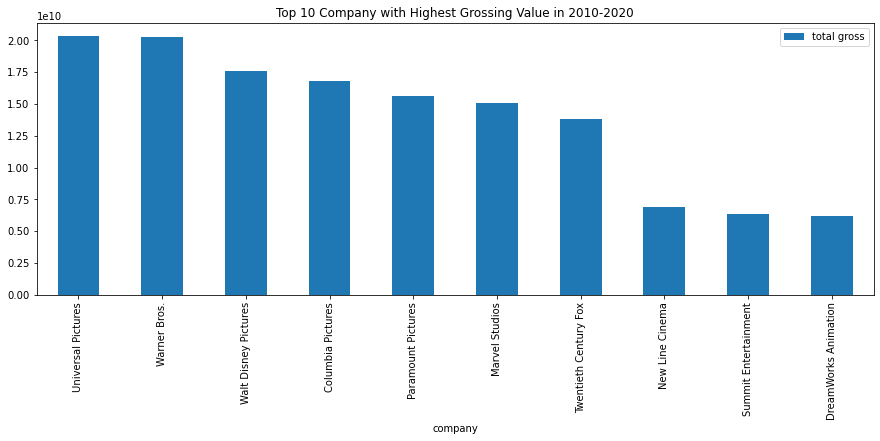

In [15]:
# Visualisasi data 10 company dengan nilai gross tertinggi
df_a.head(10).plot(x = 'company',
                   y = 'total gross',
                   title = 'Top 10 Company with Highest Grossing Value in 2010-2020',
                   figsize = (15,5),
                   kind = 'bar')

Berdasarkan data di atas, company dengan nilai gross tertinggi di tahun 2010-2020 adalah Universal Pictures dengan nilai gross sebesar 20.344.223.777 USD. Lalu diikuti dengan company Warner Bros, Walt Disney Pictures, dan Columbia Pictures.

## V.2 Jumlah film yang dirilis oleh company dengan nilai gross tertinggi di tahun 2010-2020
Company dengan nilai gross tertinggi di tahun 2010-2020 adalah Universal Pictures. Maka jumlah film yang akan dihitung adalah jumlah film yang dirilis oleh Universal Pictures.

In [114]:
# Menghitung jumlah film yang dirilis oleh Universal Pictures di tahun 2010-2020
df_d = df[['title', 'year']][(df['year']>2010) & (df['company']=='Universal Pictures')].groupby('year').count()
df_d.columns = df_d.columns.get_level_values(0)
df_d.reset_index(inplace=True)
df_d

,year,title
0,2011,13
1,2012,11
2,2013,9
3,2014,5
4,2015,8
5,2016,11
6,2017,6
7,2018,6
8,2019,3
9,2020,2


<AxesSubplot:title={'center':'Number of Movies that Released by Universal Pictures in 2010-2020'}, xlabel='year'>

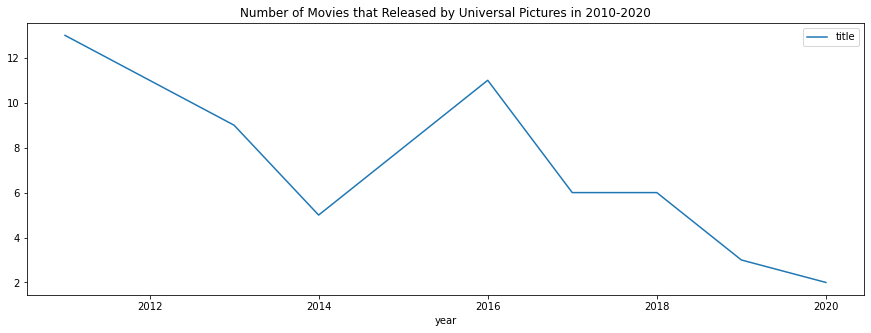

In [115]:
# Visualisasi data jumlah film yang dirilis oleh Paramount Pictures
df_d.plot(x = 'year',
          y = 'title',
          title = 'Number of Movies that Released by Universal Pictures in 2010-2020',
          figsize = (15,5),
          kind = 'line')

Berdasarkan data di atas, Universal Pictures setiap tahunnya rutin merilis film. Pada periode 2010-2020, Paramount Pictures merilis film di tahun 2011 sebanyak 13 kali, lalu di tahun 2012 sebanyak 11 kali dan 2013 sebanyak 9 kali.

## V.3 10 Film Nilai Gross Tertinggi Pada Tahun 2010-2020

In [16]:
#Mencari data film dengan nilai gross tertinggi pada tahun 2010-2020
df_b = df[['title', 'genre', 'gross']][(df['year'] > 2010)].sort_values('gross', ascending = False).head(10)
df_b = pd.DataFrame(df_b)
df_b

,title,genre,gross
7445,Avengers: Endgame,Action,2797501328
6663,Star Wars: Episode VII - The Force Awakens,Action,2069521700
7244,Avengers: Infinity War,Action,2048359754
7480,The Lion King,Animation,1670727580
6653,Jurassic World,Action,1670516444
6043,The Avengers,Action,1518815515
6646,Furious 7,Action,1515341399
7494,Frozen II,Animation,1450026933
6644,Avengers: Age of Ultron,Action,1402809540
7247,Black Panther,Action,1347597973


<AxesSubplot:title={'center':'Top 10 Highest Grossing Movies in 2010-2020'}, xlabel='title'>

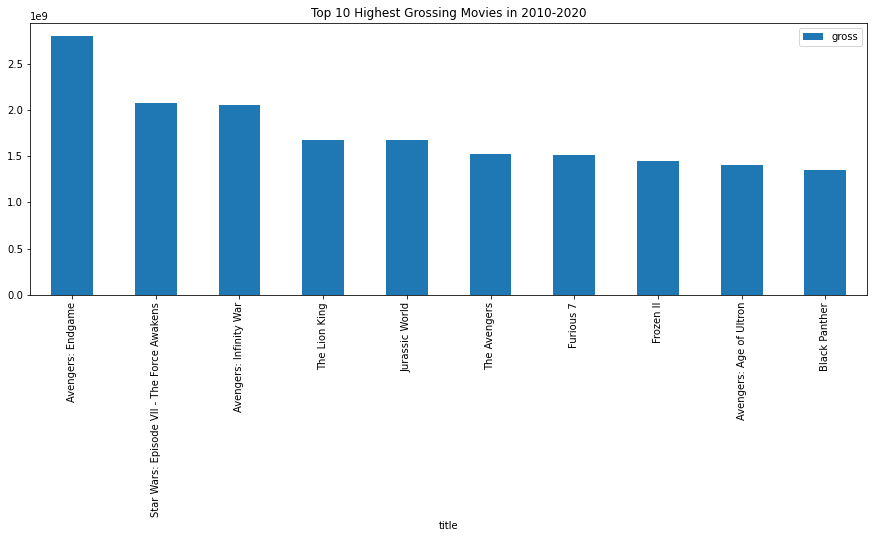

In [17]:
# Visualisasi data top 10 movie dengan gross tertinggi
df_b.plot(x = 'title',
          y = 'gross',
          title = 'Top 10 Highest Grossing Movies in 2010-2020',
          figsize = (15,5),
          kind = 'bar')

Berdasarkan data di atas, film dengan nilai gross tertinggi pada tahun 2010-2020 adalah film Avengers: Endgame dengan nilai gross sebesar 2.797.501.328 USD, lalu diikuti dengan film Star Wars: Episode VII - The Force Awakens dan Avengers: Infinity War.

## V.4 Menghitung Persentase Genre di Top 10 Film Terlaris

In [18]:
# Menghitung persentase genre film dengan nilai gross tertinggi
df_c = df_b['genre'].value_counts()/df_b['genre'].count()*100
df_c = pd.DataFrame(df_c)
df_c

,genre
Action,80.0
Animation,20.0


<AxesSubplot:title={'center':'Persentase Genre di Top 10 Film Terlaris di 2010-2020'}, ylabel='genre'>

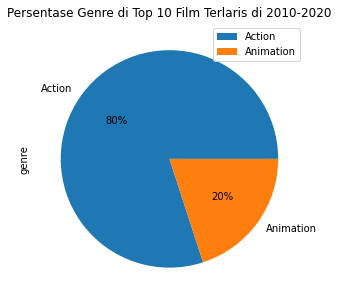

In [19]:
df_c.plot(y = 'genre',
          title = 'Persentase Genre di Top 10 Film Terlaris di 2010-2020',
          figsize = (15,5),
          kind = 'pie', autopct='%1.0f%%')

Berdasarkan data di atas, hanya terdapat dua genre pada Top 10 film terlaris, yaitu Action dan Animation. Persentase genre film Action adalah 80% dan genre Animation adalah 20%.

## V.5 Analisis Data Outlier Pada Company dengan Nilai Gross Tertinggi
Company dengan nilai gross tertinggi adalah company Universal Pictures. Maka company yang akan dicek adalah company Universal Pictures pada data kolom 'score'

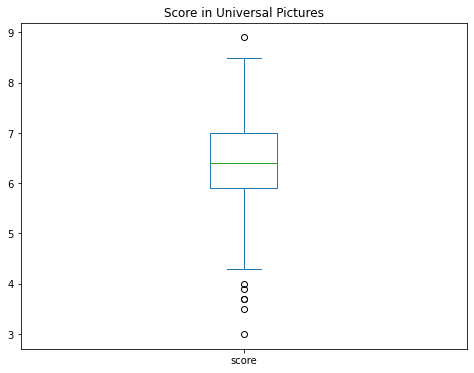

In [125]:
# Mengecek data outlier pada data score di company Universal Pictures
score_outlier = df.loc[df['company'] == 'Universal Pictures']['score']
score_outlier.plot(kind='box', title='Score in Universal Pictures', figsize=(8,6))
plt.show()

In [117]:
# Mengubah data score_outlier menjadi dataframe baru
score_outlier = df.loc[df['company'] == 'Universal Pictures']['score']
score_clear = pd.DataFrame(score_outlier, columns=['score'])
score_clear

,score
6,7.9
23,5.3
32,5.3
39,7.5
43,6.6
...,...
7498,6.7
7514,6.5
7571,5.5
7646,7.1


Nilai IQR:
1.0
Nilai maksimum:
8.5
Nilai minimum:
4.5


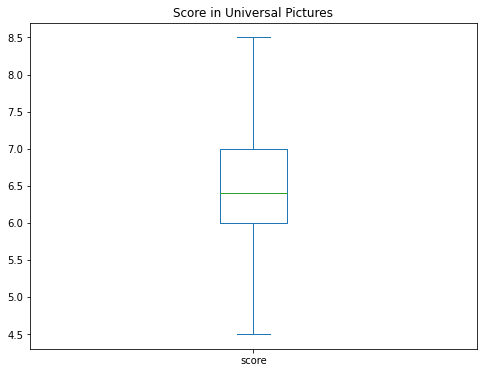

In [124]:
# Menangani data outlier dengan IQR
Q1 = score_clear['score'].quantile(0.25)
Q3 = score_clear['score'].quantile(0.75)
IQR = Q3 - Q1
print('Nilai IQR:')
print(IQR)

# Mencari nilai maksimum
nilai_max = Q3 + (1.5 * IQR)
print('Nilai maksimum:')
print(nilai_max)

# Mencari nilai minimum
nilai_min = Q1 - (1.5 * IQR)
print('Nilai minimum:')
print(nilai_min)

# Merubah data outlier menjadi null dan menghapusnya
score_clear = score_clear[~((score_clear < nilai_min) | (score_clear > nilai_max)).any(axis=1)]

# Visualisasi tanpa data outlier di Universal Pictures dengan box plot
score_clear.plot(kind='box', title='Score in Universal Pictures', figsize=(8,6))
plt.show()

Berdasarkan grafik di atas, data score pada company Paramount Pictures sebelumnya memiliki beberapa data outlier. Kemudian data outlier tersebut ditangani dengan cara merubahnya ke nilai maximum dan minimum dari Interquartile Range (IQR). Setelah ditangani data outliernya, terlihat di grafik terbaru sudah tidak ada lagi data outlier untuk data score di company Universal Pictures.

## V.6 Hubungan Antara Genre Film Dengan Laris Atau Tidaknya Suatu Film
Pada bagian ini, diasumsikan bahwa parameter film yang laris adalah film dengan nilai gross yang lebih dari 1.000.000.000 USD. Untuk mengetahui apakah genre film mempengaruhi laris atau tidaknya suatu film, bisa menggunakan analisis chi-square.

In [120]:
# Membuat kolom 'bestselling' dengan kondisi, jika nilai 'gross' lebih dari 1.000.000.000 maka 'Yes' dan jika tidak 'No'
df['bestselling'] = np.where(df['gross'] >= 1000000000, 'Yes', 'No')

# Menampilkan data hubungan antara genre dengan bestselling
df[['genre', 'bestselling']]

,genre,bestselling
0,Drama,No
1,Adventure,No
2,Action,No
3,Comedy,No
4,Comedy,No
...,...,...
7650,Adventure,No
7651,Adventure,No
7653,Crime,No
7656,Comedy,No


In [121]:
# Menampilkan jumlah data 'Yes' dan 'No'
df['bestselling'].value_counts()

No     7244
Yes      48
Name: bestselling, dtype: int64

In [122]:
# Membuat tabel kontingensi untuk perhitungan chi-square
contingency_table=pd.crosstab(df['genre'],df['bestselling'])
contingency_table

bestselling,No,Yes
genre,,
Action,1617,29
Adventure,416,5
Animation,313,11
Biography,427,0
Comedy,2184,0
Crime,511,1
Drama,1362,1
Family,9,1
Fantasy,41,0


In [123]:
# Melakukan chi-square test
stat, p, dof, expected = stats.chi2_contingency(contingency_table)
print('p=%.3f' % (p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

p=0.000
Probably dependent


Berdasarkan perhitungan di atas, nilai p = 0.000 dan p < 0.05, maka bisa dikatakan bahwa terdapat hubungan yang signifikan antara genre dan laris atau tidaknya suatu film.

# VI. Pengambilan Kesimpulan

Dari analisis yang telah dilakukan, dapat disimpulkan bahwa Universal Pictures adalah company dengan nilai gross tertinggi di periode tahun 2010-2020. Paramount Pictures memiliki nilai gross sebesar 20.344.223.777 USD. Paramount Pictures bisa menjadi company dengan nilai gross tertinggi, karena selama periode 2010-2020, Universal Pictures selalu merilis film di setiap tahunnya. Universal Pictures paling banyak merilis film pada tahun 2011, yaitu sebanyak 13 film.

Sedangkan untuk film paling laris pada periode 2010-2020 adalah film Avengers: Endgame dengan nilai gross sebesar 2.797.501.328 US. Film tersebut paling laris, karena film tersebut memiliki genre Action, dimana genre Action merupakan genre film yang paling diminati oleh masyarakat. Persentase genre Action dalam Top 10 film terlaris adalah 80%.

Data score pada Universal Pictures memiliki beberapa data outlier, yang berarti terdapat data yang terlihat sangat berbeda dari data-data lainnya. Tetapi setelah ditangani dengan cara merubahnya ke nilai maximum dan minimum dari Interquartile Range (IQR), data tersebut sudah tidak ada. Lalu setelah dilakukan analisis chi-square pada data, diketahui bahwa nilai p = 0.000 dan p < 0.05, maka bisa dikatakan bahwa terdapat hubungan yang signifikan antara genre dan laris atau tidaknya suatu film.
